# Phase 3: Adding New Features

This notebook enhances the Beijing housing dataset by engineering new features from existing columns to deepen our analysis. We'll calculate distances, derive per-unit metrics, and explore relationships through visualizations. The goal is to create a richer dataset for predictive modeling or market insights, culminating in a professionally extended dataset saved for future use.

## Dataset Loading

Load the cleaned dataset `housing_no_outlier.csv` containing pre-processed housing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from math import radians

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Load dataset
try:
    housing_no_outlier = pd.read_csv('housing_no_outlier.csv', encoding='gbk')
    logger.info(f"Dataset loaded successfully. Shape: {housing_no_outlier.shape}")
except FileNotFoundError:
    logger.error("File 'housing_no_outlier.csv' not found.")
    raise

housing_no_outlier.head()

2025-04-09 23:30:43,623 - INFO - Dataset loaded successfully. Shape: (290395, 18)


,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,floor_number
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,26
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,22
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,21
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,1960,rough,mixed,0.333,no elevator,has subway,1,6
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,8


## Part 1: Distance to Capital

Calculate the distance of each property to Beijing's capital center (Lng: 116.4074, Lat: 39.9042) using the Haversine formula. This feature, `distanceToCapital`, is stored in kilometers and reflects proximity to the city center, a key factor in real estate valuation.

**Formula**:  
$$ distance = acos(sin(φ_1) * sin(φ_2) + cos(φ_1) * cos(φ_2) * cos(λ_2 - λ_1)) * 6371.0088 $$
Where: $φ$ = latitude, $λ$ = longitude, and 6371.0088 km is Earth's radius.

In [2]:
# Define capital coordinates in radians
capital_lng = radians(116.4074)
capital_lat = radians(39.9042)

# Create a copy of the dataset
housing_capital = housing_no_outlier.copy()

# Convert lat/lng to radians
lat_rad = np.radians(housing_capital['Lat'])
lng_rad = np.radians(housing_capital['Lng'])

# Vectorized distance calculation
distance = np.arccos(
    np.sin(lat_rad) * np.sin(capital_lat) +
    np.cos(lat_rad) * np.cos(capital_lat) * np.cos(capital_lng - lng_rad)
) * 6371.0088

housing_capital['distanceToCapital'] = distance

# Validate
if housing_capital['distanceToCapital'].isnull().any():
    logger.warning("NaN values detected in 'distanceToCapital'.")
else:
    logger.info("'distanceToCapital' added successfully.")

housing_capital.head()

2025-04-09 23:31:01,656 - INFO - 'distanceToCapital' added successfully.


,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,floor_number,distanceToCapital
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,26,14.074996
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,22,4.701224
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,21,19.293041
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,1960,rough,mixed,0.333,no elevator,has subway,1,6,2.683335
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,8,10.914652


## Part 2: Price Per Square Meter

Derive the price per square meter (`pricePerSquare`) by dividing `totalPrice` (in million Yuan) by `square` (in square meters), then converting to Yuan by multiplying by 1000. This metric is critical for comparing property values across different sizes.

In [3]:
# Calculate price per square meter
housing_pps = housing_capital.copy()
housing_pps['pricePerSquare'] = (housing_pps['totalPrice'] / housing_pps['square']) * 1000

# Validate
if housing_pps['pricePerSquare'].isnull().any() or (housing_pps['pricePerSquare'] <= 0).any():
    logger.warning("Invalid values detected in 'pricePerSquare'.")
else:
    logger.info("'pricePerSquare' added successfully.")

housing_pps.head()

2025-04-09 23:31:12,633 - INFO - 'pricePerSquare' added successfully.


,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,floor_number,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,26,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,22,4.701224,4343.556428
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,21,19.293041,2220.149254
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,1960,rough,mixed,0.333,no elevator,has subway,1,6,2.683335,4839.506173
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,8,10.914652,5200.000000


## Part 3: Additional Features

Introduce three new features to enrich the dataset:
- **`ageOfProperty`**: Years between `constructionTime` and `tradeTime`.
- **`roomDensity`**: Ratio of total rooms to `square`, indicating space efficiency.
- **`pricePerRoom`**: `totalPrice` divided by total rooms, offering a per-room cost perspective.

In [4]:
# Convert tradeTime to year
housing_extended = housing_pps.copy()
housing_extended['tradeYear'] = pd.to_datetime(housing_extended['tradeTime']).dt.year

# Calculate property age
housing_extended['ageOfProperty'] = housing_extended['tradeYear'] - housing_extended['constructionTime']

# Calculate total rooms
housing_extended['totalRooms'] = (housing_extended['livingRoom'] + housing_extended['drawingRoom'] +
                                 housing_extended['kitchen'] + housing_extended['bathRoom'])

# Calculate room density
housing_extended['roomDensity'] = housing_extended['totalRooms'] / housing_extended['square']

# Calculate price per room
housing_extended['pricePerRoom'] = (housing_extended['totalPrice'] / housing_extended['totalRooms']) * 1000

# Drop temporary column
housing_extended = housing_extended.drop(columns=['tradeYear'])

# Validate new features
for col in ['ageOfProperty', 'roomDensity', 'pricePerRoom']:
    if housing_extended[col].isnull().any() or (housing_extended[col] < 0).any():
        logger.warning(f"Invalid values detected in '{col}'.")
    else:
        logger.info(f"'{col}' added successfully.")

housing_extended.head()

2025-04-09 23:31:19,886 - WARNING - Invalid values detected in 'ageOfProperty'.
2025-04-09 23:31:19,889 - INFO - 'roomDensity' added successfully.
2025-04-09 23:31:19,891 - INFO - 'pricePerRoom' added successfully.


,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,...,elevator,subway,district,floor_number,distanceToCapital,pricePerSquare,ageOfProperty,totalRooms,roomDensity,pricePerRoom
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,...,has elevator,has subway,7,26,14.074996,3167.938931,11,5,0.038168,83000.000000
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,...,has elevator,no subway,7,22,4.701224,4343.556428,12,7,0.052878,82142.857143
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,...,has elevator,no subway,6,21,19.293041,2220.149254,8,6,0.044776,49583.333333
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,...,no elevator,has subway,1,6,2.683335,4839.506173,56,5,0.061728,78400.000000
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,...,has elevator,no subway,7,8,10.914652,5200.000000,11,3,0.056604,91866.666667


## Part 4: Visualization and Analysis

Visualize the effect of `elevator` on `pricePerSquare` using KDE plots and boxplots. Additionally, explore correlations between new features and `pricePerSquare`.

C:\Users\MSI\AppData\Local\Temp\ipykernel_9528\3117572101.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_extended, x='elevator', y='pricePerSquare', ax=ax2,


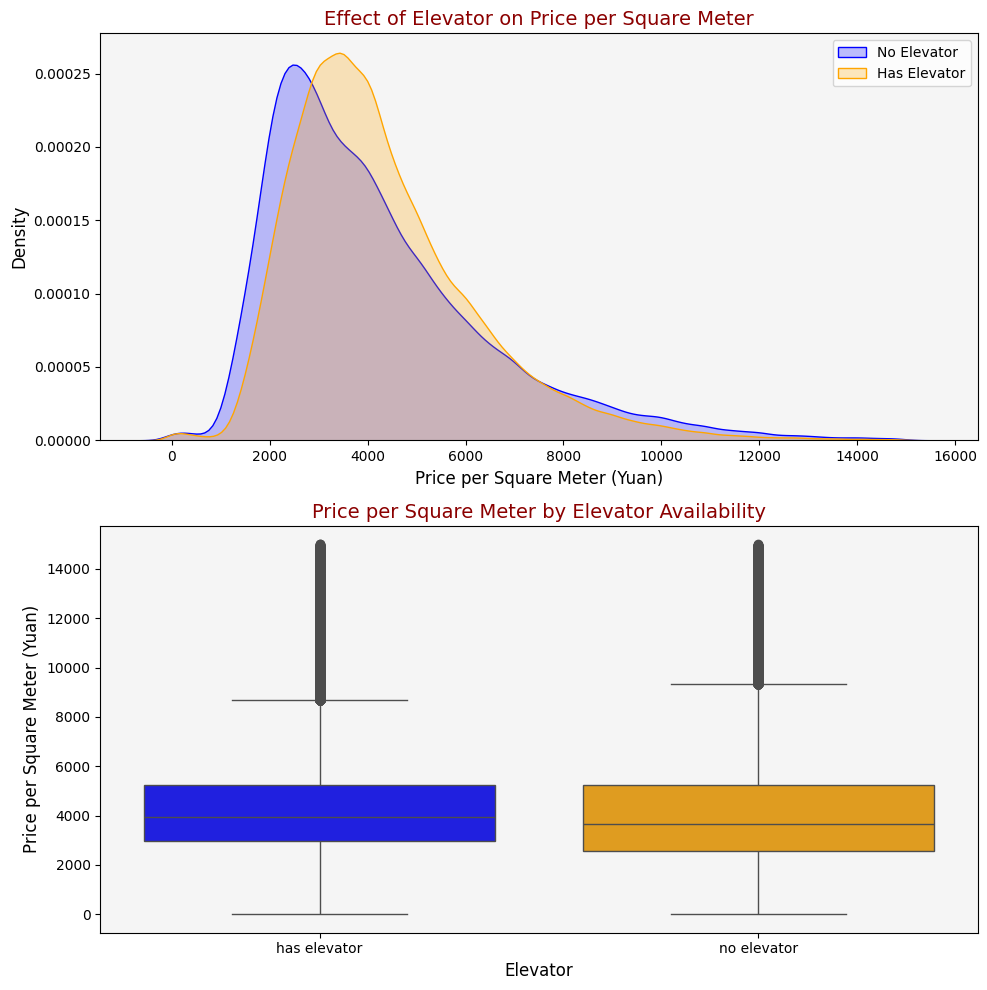

2025-04-09 23:31:34,295 - INFO - Correlation matrix:
                   pricePerSquare  distanceToCapital  ageOfProperty  \
pricePerSquare           1.000000          -0.450529       0.345638   
distanceToCapital       -0.450529           1.000000      -0.323288   
ageOfProperty            0.345638          -0.323288       1.000000   
roomDensity              0.298152          -0.237547       0.525140   
pricePerRoom             0.807465          -0.343634       0.063511   

                   roomDensity  pricePerRoom  
pricePerSquare        0.298152      0.807465  
distanceToCapital    -0.237547     -0.343634  
ageOfProperty         0.525140      0.063511  
roomDensity           1.000000     -0.197353  
pricePerRoom         -0.197353      1.000000  


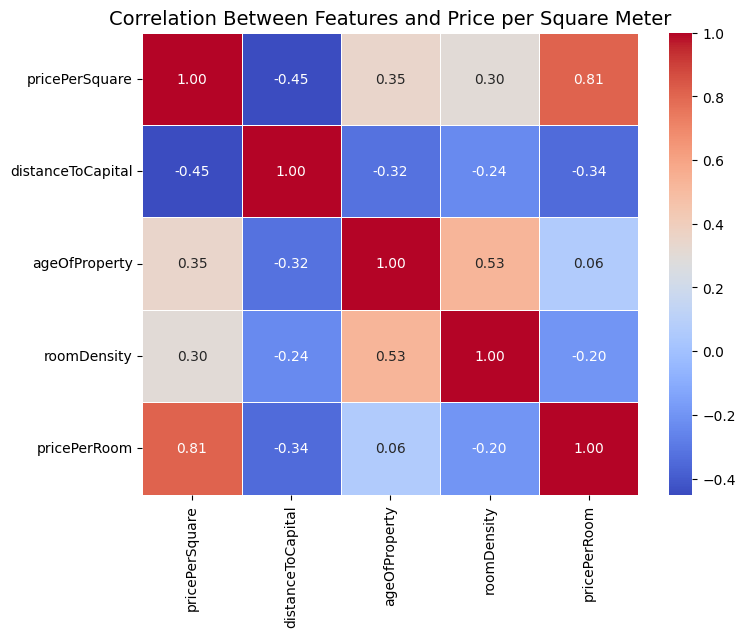

In [5]:
# Set up the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), height_ratios=[1, 1])

# KDE plot: Elevator effect on pricePerSquare
sns.kdeplot(data=housing_extended[housing_extended['elevator'] == 'no elevator'],
            x='pricePerSquare', ax=ax1, label='No Elevator', color='blue', fill=True)
sns.kdeplot(data=housing_extended[housing_extended['elevator'] == 'has elevator'],
            x='pricePerSquare', ax=ax1, label='Has Elevator', color='orange', fill=True)
ax1.set_title('Effect of Elevator on Price per Square Meter', fontsize=14, color='darkred')
ax1.set_xlabel('Price per Square Meter (Yuan)', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.legend()
ax1.set_facecolor('#f5f5f5')

# Boxplot: Elevator effect on pricePerSquare
sns.boxplot(data=housing_extended, x='elevator', y='pricePerSquare', ax=ax2,
            palette=['blue', 'orange'])
ax2.set_title('Price per Square Meter by Elevator Availability', fontsize=14, color='darkred')
ax2.set_xlabel('Elevator', fontsize=12)
ax2.set_ylabel('Price per Square Meter (Yuan)', fontsize=12)
ax2.set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = housing_extended[['pricePerSquare', 'distanceToCapital',
                                      'ageOfProperty', 'roomDensity', 'pricePerRoom']].corr()
logger.info("Correlation matrix:\n%s", correlation_matrix)

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Features and Price per Square Meter', fontsize=14)
plt.show()

## Save Extended Dataset

Export the enhanced dataset with new features for use in subsequent analysis.

In [ ]:
housing_extended.to_csv('housing_extended.csv', encoding='gbk', index=False)
logger.info("Extended dataset saved as 'housing_extended.csv'")

## Submission Preparation

Prepare files for submission by saving intermediate datasets and compressing them into `result.zip`.

In [ ]:
import zipfile
import joblib

# Save intermediate datasets (first 100 rows)
housing_capital.head(100).to_csv('housing_capital.csv', encoding='gbk', index=False)
housing_pps.head(100).to_csv('housing_pps.csv', encoding='gbk', index=False)
housing_extended.head(100).to_csv('housing_extended_100.csv', encoding='gbk', index=False)
joblib.dump(fig, 'fig')

# Compress files
file_names = ['housing_capital.csv', 'housing_pps.csv', 'housing_extended_100.csv',
              'fig', '3_add_new_features.ipynb']
with zipfile.ZipFile('result.zip', 'w', compression=zipfile.ZIP_DEFLATED) as zf:
    for file in file_names:
        zf.write(file)
logger.info("Submission files compressed into 'result.zip'")